# Analysis of Blood Pressure Abnormality

# Introduction
<br>
**We have a data which classified if patients have blood pressure issue or not according to features in it <br>
**We will try to use this data to create a model which tries predict if a patient has this disease or not <br>
**We will use classification algorithms <br>

As per the problem statement, the steps that should be followed by the students are as follows :

- Loading Data
- Exploratory Data Analysis (EDA)
  - Data Mining
  - Plots to study trends
  - Variable transformation
- Feature engineering
- Model Building and Validation

The codes for each of these steps are as follows:

# Loading Data 

In [1]:
#Loading All Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import metrics
from sklearn import preprocessing

In [2]:
abp = pd.read_csv('C:/Users/Aditya/Downloads/Patient_with_abnormal_bloodpressure.csv')


In [3]:
abp.shape

(2000, 15)

In [4]:
abp

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [5]:
print(abp.dtypes)

Patient_Number                     int64
Blood_Pressure_Abnormality         int64
Level_of_Hemoglobin              float64
Genetic_Pedigree_Coefficient     float64
Age                                int64
BMI                                int64
Sex                                int64
Pregnancy                        float64
Smoking                            int64
Physical_activity                  int64
salt_content_in_the_diet           int64
alcohol_consumption_per_day      float64
Level_of_Stress                    int64
Chronic_kidney_disease             int64
Adrenal_and_thyroid_disorders      int64
dtype: object


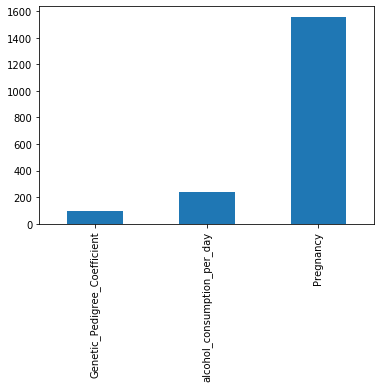

In [6]:
##  Missing Data Analysis 
# Visualize null count in overall dataframe
null_in_data = abp.isnull().sum()

null_in_data = null_in_data[null_in_data > 0]

null_in_data.sort_values(inplace=True)

null_in_data.plot.bar()

plt.show()


In [7]:
abp.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

# Data Mining

**drop Patient_Number as they are not relevant for prediction purpose**

In [8]:
abp = abp.drop('Patient_Number',axis=1)

In [9]:
abp.alcohol_consumption_per_day  = abp.alcohol_consumption_per_day.fillna(abp.alcohol_consumption_per_day.median())

In [10]:
abp.Pregnancy = abp.Pregnancy.fillna(0)

In [11]:
abp.Genetic_Pedigree_Coefficient = abp.Genetic_Pedigree_Coefficient.fillna(abp.Genetic_Pedigree_Coefficient.median())

# Plots to study trends

**Numerical variables**

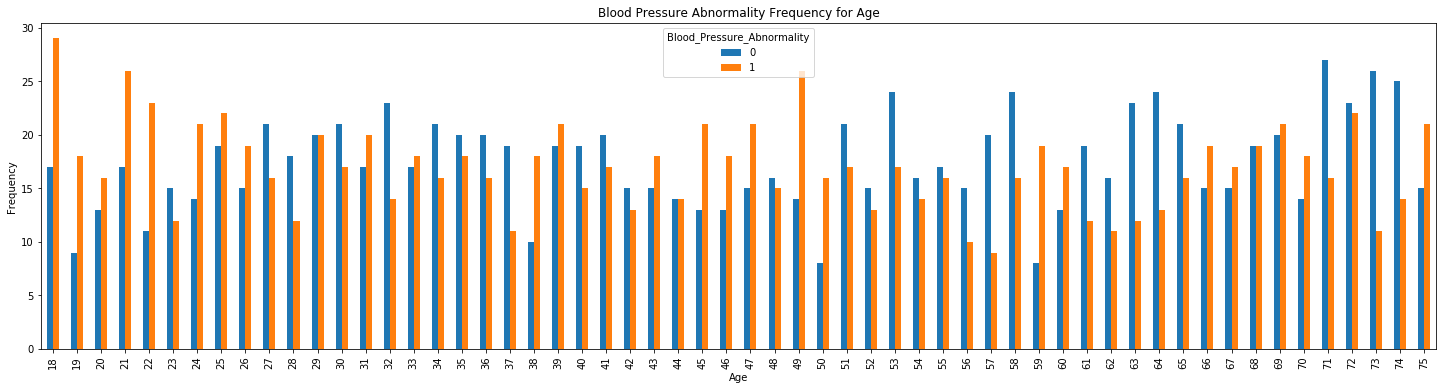

In [12]:
pd.crosstab(abp.Age,abp.Blood_Pressure_Abnormality).plot(kind="bar",figsize=(25,6))
plt.title('Blood Pressure Abnormality Frequency for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Above figure gives the reprsentation for "Blood_Pressure_Abnormality" against "Age"**

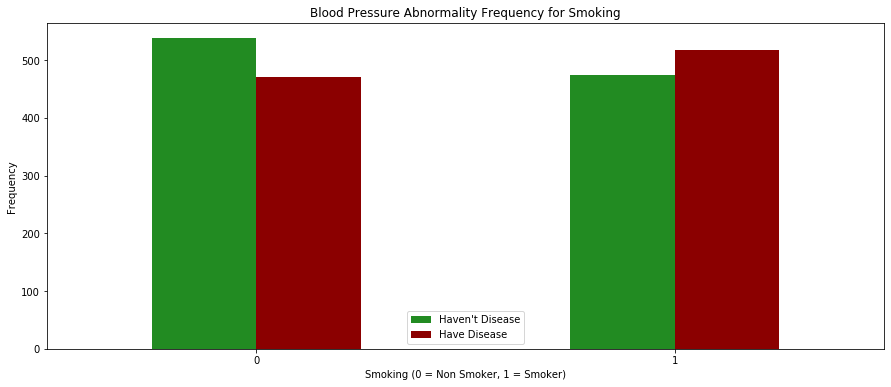

In [13]:
pd.crosstab(abp.Sex,abp.Blood_Pressure_Abnormality).plot(kind="bar",figsize=(15,6),color=['forestgreen','darkred' ])
plt.title('Blood Pressure Abnormality Frequency for Smoking')
plt.xlabel('Smoking (0 = Non Smoker, 1 = Smoker)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**Above figure gives the reprsentation for Blood_Pressure_Abnormality against Smoking**

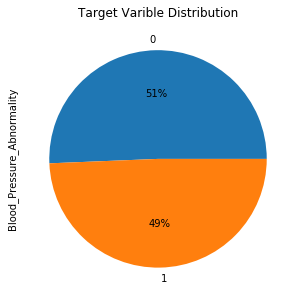

In [14]:
plt.figure(figsize=(5,5))
plt.title('Target Varible Distribution')
abp['Blood_Pressure_Abnormality'].value_counts().plot(kind = 'pie',autopct = '%1.0f%%')
plt.show()

**Above figure gives the reprsentation for value counts for Blood_Pressure_Abnormality**

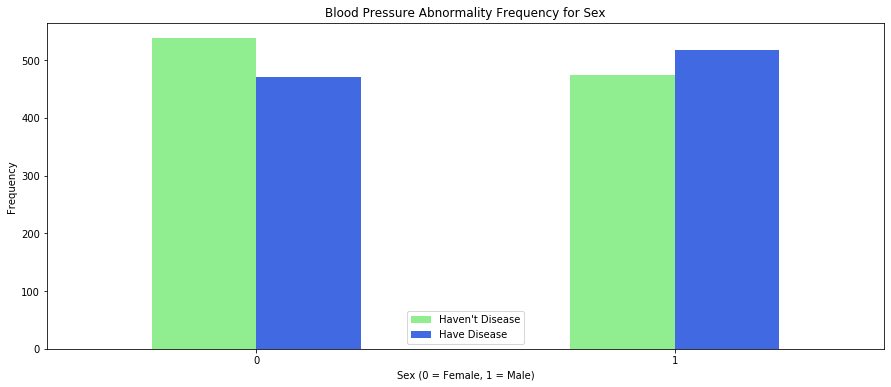

In [15]:
pd.crosstab(abp.Sex,abp.Blood_Pressure_Abnormality).plot(kind="bar",figsize=(15,6),color=['lightgreen','royalblue' ])
plt.title('Blood Pressure Abnormality Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**Above figure gives the reprsentation for Blood_Pressure_Abnormality against Sex**

**Correlation Plot**


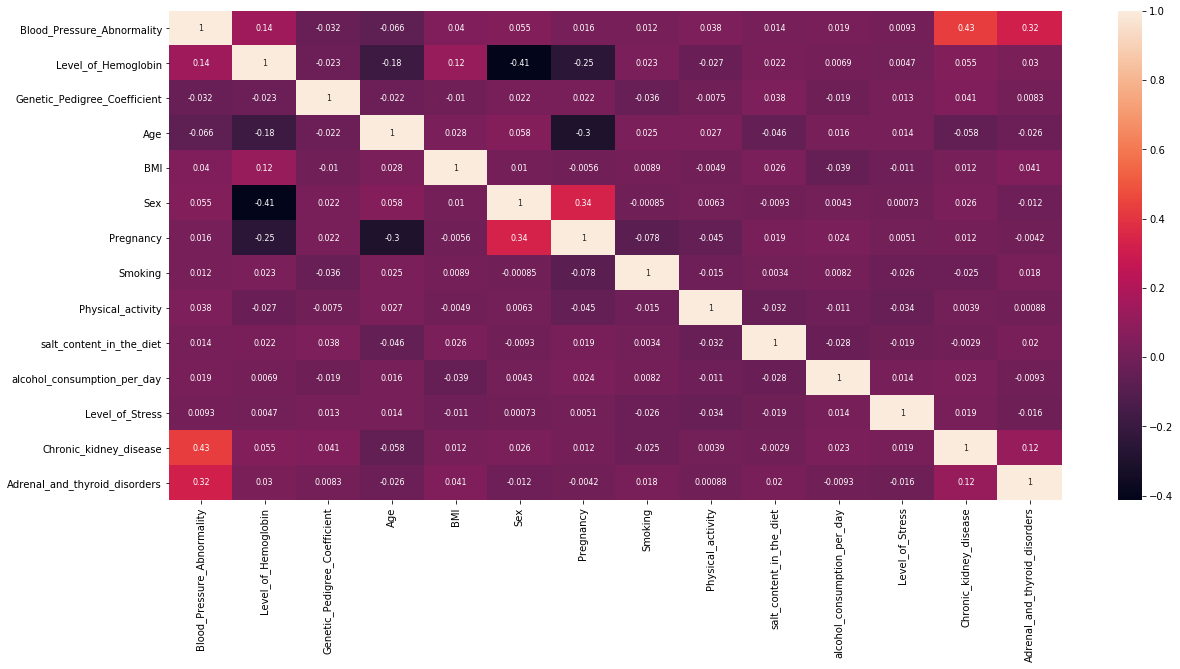

In [16]:
abp_num = abp.select_dtypes(include=['int64','float64' ])
correlation = abp_num.corr()

plt.figure(figsize=(20,9))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True, annot_kws={"size": 8})
plt.show()

In [17]:
abp.shape

(2000, 14)

In [18]:
abp.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,250.0,2,1,1
1,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.0,3,0,0
2,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.0,2,1,0
3,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.0,1,1,0
4,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.0,2,0,0


* Divide the target variable and independent variable into two sepearete object 
* named as X(contains all Independent Varibale) and (has only Target Variable)**

In [19]:
X = abp.iloc[:,1:14]

In [20]:
X.head()

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,11.28,0.90,34,23,1,1.0,0,45961,48071,250.0,2,1,1
1,9.75,0.23,54,33,1,0.0,0,26106,25333,205.0,3,0,0
2,10.79,0.91,70,49,0,0.0,0,9995,29465,67.0,2,1,0
3,11.00,0.43,71,50,0,0.0,0,10635,7439,242.0,1,1,0
4,14.17,0.83,52,19,0,0.0,0,15619,49644,397.0,2,0,0


In [21]:
y = abp.iloc[:,0]

In [22]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Blood_Pressure_Abnormality, dtype: int64

# Sampling

**Divide the data into model training dataset and test dataset.**


In [23]:
import sklearn
from sklearn.model_selection import train_test_split  

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
print(X_train.shape,y_train.shape)
print('\n')
print(X_test.shape,y_test.shape)

(1340, 13) (1340,)


(660, 13) (660,)


In [26]:
print(sum(y_train==0))
print(sum(y_train==1))

657
683


# Model Building, testing and validation

**Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log = LogisticRegression()

In [29]:
log.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

**Prediction for model**


In [30]:
predictions_log = log.predict(X_test)
predictions_log

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**Confusion Matrix**

In [31]:
tab_log = confusion_matrix(predictions_log, y_test)
tab_log

array([[171, 121],
       [185, 183]], dtype=int64)

In [32]:
TP_log = tab_log[0, 0]
TN_log = tab_log[1, 1]
FP_log = tab_log[1,0]
FN_log = tab_log[0, 1]

# Accuracy by calculation & built-in fuction
accuracy_log = ((TP_log + TN_log) / float(TP_log + TN_log + FP_log + FN_log))
print('Overall Accuracy of Logistic Regression is :',accuracy_log*100)

print('\n')
# Sensitivity or recall score or tpr
sensitivity_log = TP_log / float(FN_log + TP_log)
print('Sensitivity of Logistic Regression is :',sensitivity_log*100)

print('\n')
#Specificity
specificity_log = TN_log / (TN_log + FP_log)
print('Specificity of Logistic Regression is :',specificity_log*100)

Overall Accuracy of Logistic Regression is : 53.63636363636364


Sensitivity of Logistic Regression is : 58.56164383561644


Specificity of Logistic Regression is : 49.72826086956522


# Decision Tree Classifier


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dte = DecisionTreeClassifier()

In [35]:
dte.fit(X_train,y_train)

DecisionTreeClassifier()

**Prediction for model**


In [36]:
predictions_dte = dte.predict(X_test)
predictions_dte

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,

**Confusion Matrix**


In [37]:
tab_dte = confusion_matrix(predictions_dte, y_test)
tab_dte

array([[289,  55],
       [ 67, 249]], dtype=int64)

**Accuracy for Decision Tree**

In [38]:
TP_dte = tab_dte[0, 0]
TN_dte = tab_dte[1, 1]
FP_dte = tab_dte[1,0]
FN_dte = tab_dte[0, 1]

# Accuracy by calculation & built-in fuction
accuracy_dte = ((TP_dte + TN_dte) / float(TP_dte + TN_dte + FP_dte + FN_dte))
print('Overall Accuracy of Decision Tree Classifier is :',accuracy_dte*100)

print('\n')
# Sensitivity or recall score or tpr
sensitivity_dte = TP_dte / float(FN_dte + TP_dte)
print('Sensitivity of Decision Tree Classifier is :',sensitivity_dte*100)

print('\n')
#Specificity
specificity_dte = TN_dte / (TN_dte + FP_dte)
print('Specificity of Decision Tree Classifier is :',specificity_dte*100)

Overall Accuracy of Decision Tree Classifier is : 81.51515151515152


Sensitivity of Decision Tree Classifier is : 84.01162790697676


Specificity of Decision Tree Classifier is : 78.79746835443038


# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfe = RandomForestClassifier(n_estimators=800)


In [41]:
rfe.fit(X_train,y_train)

RandomForestClassifier(n_estimators=800)

**Prediction for model**


In [42]:
predictions_rf = rfe.predict(X_test)

**Confusion Matrix**


In [43]:
tab_rf = confusion_matrix(predictions_rf, y_test)
tab_rf

array([[309,  26],
       [ 47, 278]], dtype=int64)

In [44]:
TP_rf = tab_rf[0, 0]
TN_rf = tab_rf[1, 1]
FP_rf = tab_rf[1,0]
FN_rf = tab_rf[0, 1]

# Accuracy by calculation & built-in fuction
accuracy_rf = ((TP_rf + TN_rf) / float(TP_rf + TN_rf + FP_rf + FN_rf))
print('Overall Accuracy of Random Forest is :',accuracy_rf*100)
print('\n')
# Sensitivity or recall score or tpr
sensitivity_rf = TP_rf / float(FN_rf + TP_rf)
print('Sensitivity of Random Forest is :',sensitivity_rf*100)
print('\n')
#Specificity
specificity_rf = TN_rf / (TN_rf + FP_rf)
print('Specificity of Random Forest is :',specificity_rf*100)

Overall Accuracy of Random Forest is : 88.93939393939394


Sensitivity of Random Forest is : 92.23880597014926


Specificity of Random Forest is : 85.53846153846155


**Feature Importance**

In [45]:
feature_importance = pd.DataFrame({'Significant_features':rfe.feature_importances_,'Columns_name':X_train.columns}).sort_values(['Significant_features'],ascending = False)
feature_importance

,Significant_features,Columns_name
1,0.262623,Genetic_Pedigree_Coefficient
0,0.226285,Level_of_Hemoglobin
11,0.109397,Chronic_kidney_disease
12,0.068345,Adrenal_and_thyroid_disorders
7,0.060645,Physical_activity
8,0.060601,salt_content_in_the_diet
2,0.057075,Age
9,0.054744,alcohol_consumption_per_day
3,0.052801,BMI
4,0.016769,Sex


# Support Vector Machine

In [46]:
from sklearn.svm import LinearSVC

In [47]:
svm = LinearSVC()

In [48]:
svm.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

**Prediction for model**

In [49]:
predictions_svm = svm.predict(X_test)


**Confusion Matrix**


In [50]:
tab_svm = confusion_matrix(predictions_svm, y_test)
tab_svm

array([[  9,   5],
       [347, 299]], dtype=int64)

In [51]:
TP_svm = tab_svm[0, 0]
TN_svm = tab_svm[1, 1]
FP_svm = tab_svm[1,0]
FN_svm = tab_svm[0, 1]

# Accuracy by calculation & built-in fuction
accuracy_svm = ((TP_svm + TN_svm) / float(TP_svm + TN_svm + FP_svm + FN_svm))
print('Overall Accuracy of Support Vector Machine is :',accuracy_svm*100)
print('\n')
# Sensitivity or recall score or tpr
sensitivity_svm = TP_svm / float(FN_svm + TP_svm)
print('Sensitivity of Support Vector Machine is :',sensitivity_svm*100)
print('\n')
#Specificity
specificity_svm = TN_svm / (TN_rf + FP_svm)
print('Specificity of Support Vector Machine is :',specificity_svm*100)

Overall Accuracy of Support Vector Machine is : 46.666666666666664


Sensitivity of Support Vector Machine is : 64.28571428571429


Specificity of Support Vector Machine is : 47.839999999999996


# Adaptive Boosting

In [52]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

AdaBoost = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100)


In [53]:
AdaBoost.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

**Prediction for model**

In [54]:
predictions_abc = AdaBoost.predict(X_test)

**Confusion Matrix**


In [55]:
tab_abc = confusion_matrix(predictions_abc, y_test)
tab_abc

array([[288,  49],
       [ 68, 255]], dtype=int64)

**Accuracy for Adaptive Boosting**

In [56]:
accuracy_abp = tab_abc.diagonal().sum() / tab_abc.sum()*100
print('Accuracy for AdaBoost :',accuracy_abp)

Accuracy for AdaBoost : 82.27272727272728


In [57]:
TP_abc = tab_abc[0, 0]
TN_abc = tab_abc[1, 1]
FP_abc = tab_abc[1,0]
FN_abc = tab_abc[0, 1]

# Accuracy by calculation & built-in fuction
Overall_Accuracy_abc= ((TP_abc + TN_abc) / float(TP_abc + TN_abc + FP_abc + FN_abc))
print('Overall Accuracy of Adaptive Boosting is :',Overall_Accuracy_abc*100)
print('\n')
# Sensitivity or recall score or tpr
sensitivity_abc = TP_abc / float(FN_abc + TP_abc)
print('Sensitivity of Adaptive Boosting is :',sensitivity_abc*100)
print('\n')
#Specificity
specificity_abc = TN_abc / (TN_abc + FP_abc)
print('Specificity of Adaptive Boosting is :',specificity_abc*100)

Overall Accuracy of Adaptive Boosting is : 82.27272727272728


Sensitivity of Adaptive Boosting is : 85.45994065281899


Specificity of Adaptive Boosting is : 78.94736842105263


**Compare the accuracies for different algorithms**

In [58]:
accuracies = ({"Logistic Regression":accuracy_log,
               "SVM":accuracy_svm,
               "Decision Tree Classifier":accuracy_dte,
               "Adaptive Boosting":Overall_Accuracy_abc,
               "Random Forest":accuracy_rf,})

**Plot for Accuracies**

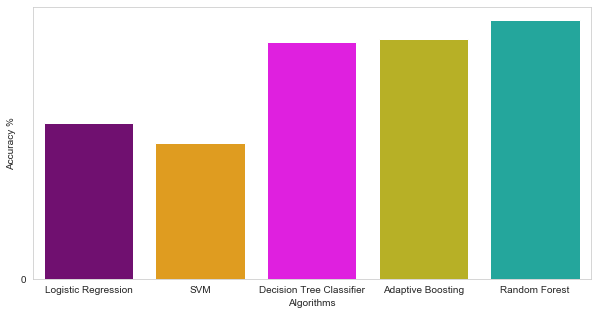

In [59]:
colors = ["purple", "orange", "magenta","#CFC60E","#0FBBAE"]
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

**Plot for Confusion Matrix**

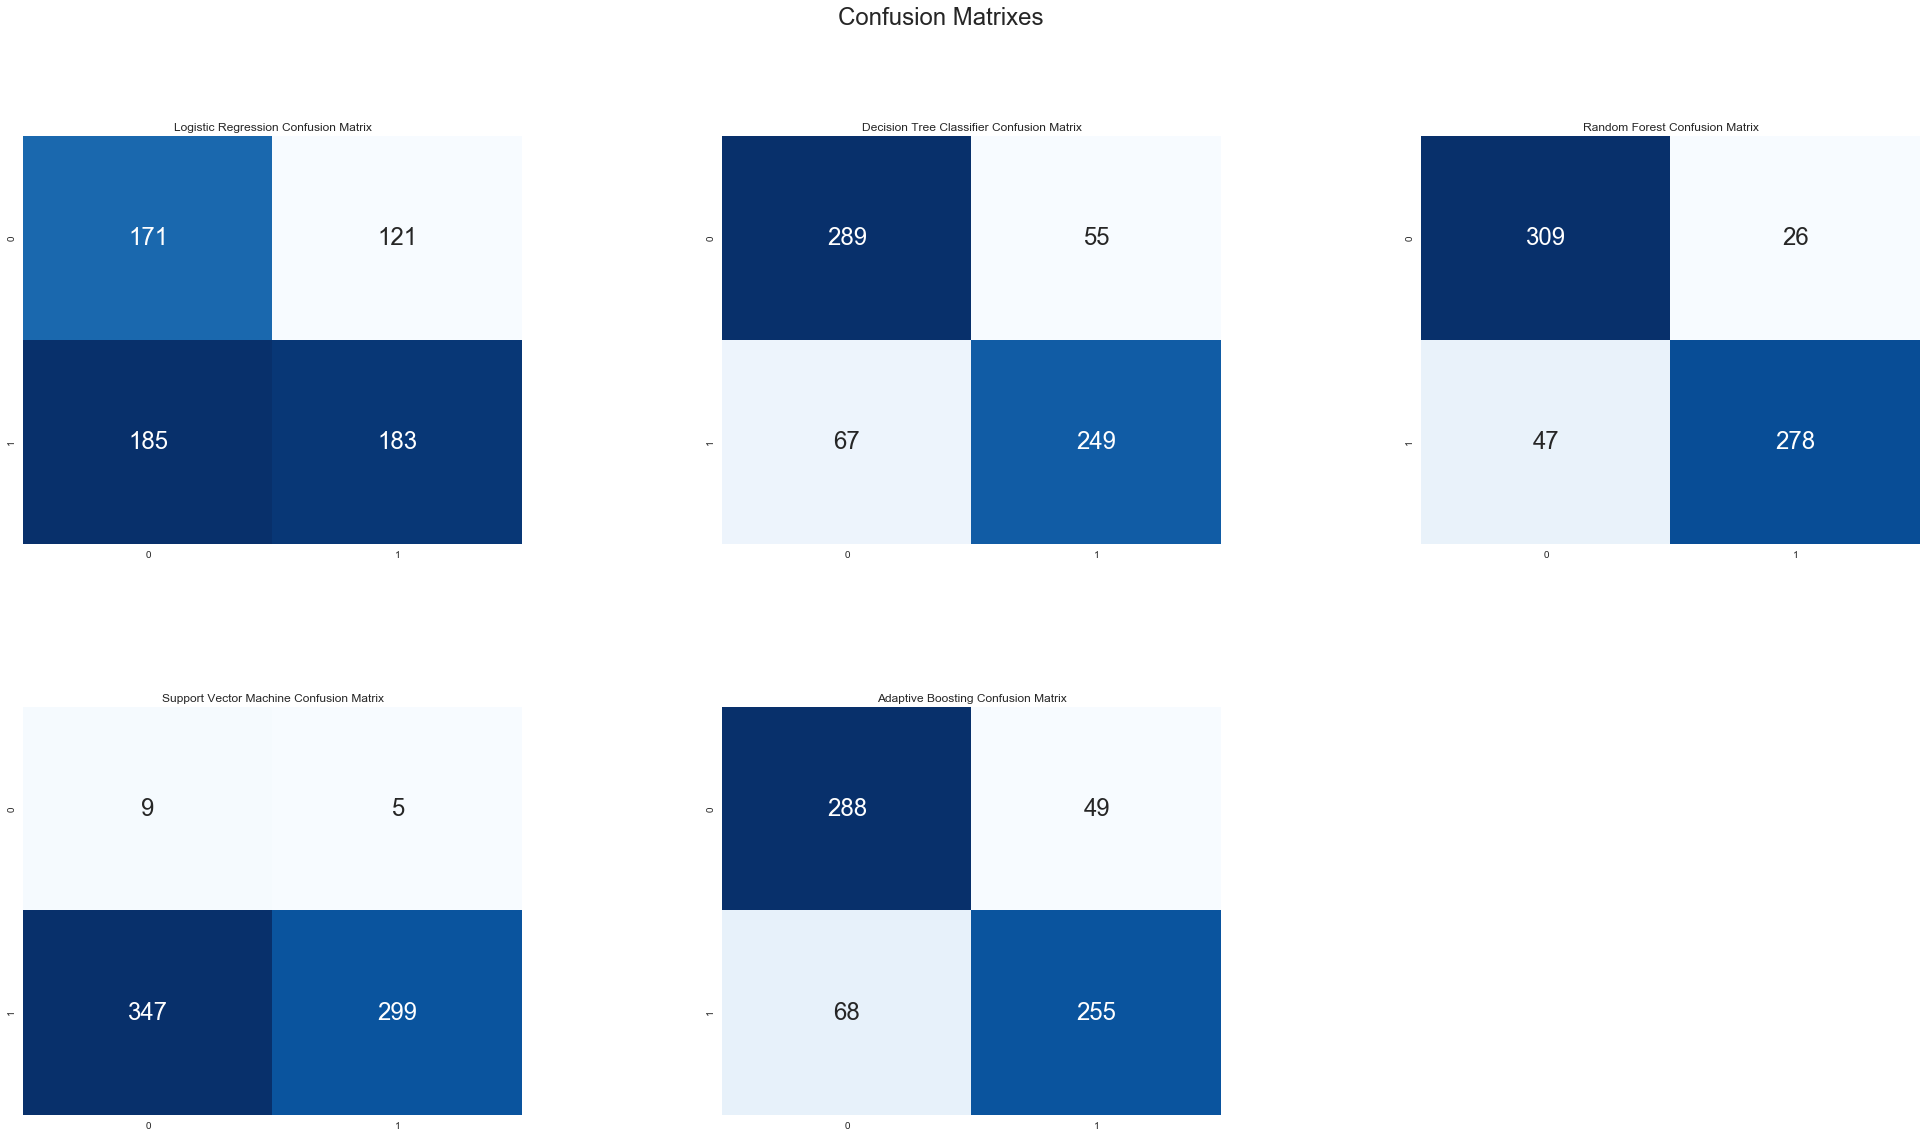

In [60]:
plt.figure(figsize=(34,18))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(tab_log,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(tab_dte,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(tab_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(tab_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Adaptive Boosting Confusion Matrix")
sns.heatmap(tab_abc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

**Conclusion:-**
*    Decision Tree is the best model among other algorithms.
*    It has overall accuracy is 81.51%
*    Sensitivity for Decision Tree is  84.01%
*    Specificity for Decision Tree is  78.79%